In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
import xgboost as xgb

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

df=pd.read_csv("heart_disease.data",names=columns)



In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestbps    294 non-null object
chol        294 non-null object
fbs         294 non-null object
restecg     294 non-null object
thalach     294 non-null object
exang       294 non-null object
oldpeak     294 non-null float64
slope       294 non-null object
ca          294 non-null object
thal        294 non-null object
num         294 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 32.2+ KB


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

In [6]:
df = df.replace('?',np.nan)

In [7]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

#for feature in df.columns: # Loop through all columns in the dataframe
#    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
#          df[feature] =   df[feature].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestbps    293 non-null object
chol        271 non-null object
fbs         286 non-null object
restecg     293 non-null object
thalach     293 non-null object
exang       293 non-null object
oldpeak     294 non-null float64
slope       104 non-null object
ca          3 non-null object
thal        28 non-null object
num         294 non-null int64
dtypes: float64(1), int64(4), object(9)
memory usage: 32.2+ KB


In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,294.0,47.826531,7.811812,28.0,42.0,49.0,54.0,66.0
sex,294.0,0.724490,0.447533,0.0,0.0,1.0,1.0,1.0
cp,294.0,2.982993,0.965117,1.0,2.0,3.0,4.0,4.0
oldpeak,294.0,0.586054,0.908648,0.0,0.0,0.0,1.0,5.0
num,294.0,0.360544,0.480977,0.0,0.0,0.0,1.0,1.0


In [11]:
for i,columns in enumerate(df.columns):
        print("{} \t {}".format(df[columns].nunique(),columns))
        

38 	 age
2 	 sex
4 	 cp
31 	 trestbps
153 	 chol
2 	 fbs
3 	 restecg
71 	 thalach
2 	 exang
10 	 oldpeak
3 	 slope
1 	 ca
3 	 thal
2 	 num


In [62]:

for i,columns in enumerate(df.columns):
        print("\n{} \t {}".format(df[columns].value_counts(),columns))


54    25
48    19
52    17
55    15
49    15
46    13
53    12
43    12
50    12
39    11
41    11
47    10
56    10
51     9
58     9
59     8
37     8
45     8
44     7
42     7
40     7
38     7
35     5
57     5
36     5
32     4
34     4
65     3
60     2
33     2
31     2
61     2
62     2
29     2
30     1
66     1
63     1
28     1
Name: age, dtype: int64 	 age

1    213
0     81
Name: sex, dtype: int64 	 sex

4    123
2    106
3     54
1     11
Name: cp, dtype: int64 	 cp

120.0    65
130.0    55
140.0    50
150.0    23
110.0    21
160.0    20
125.0     8
100.0     6
180.0     6
145.0     5
135.0     5
170.0     5
112.0     3
118.0     2
122.0     2
124.0     2
115.0     2
105.0     1
98.0      1
155.0     1
190.0     1
128.0     1
132.0     1
108.0     1
113.0     1
92.0      1
106.0     1
200.0     1
138.0     1
136.0     1
142.0     1
Name: trestbps, dtype: int64 	 trestbps

243.0    25
246.0     5
275.0     5
230.0     5
216.0     4
263.0     4
238.0     4
260.0     4
224

In [13]:
sns.pairplot(df,diag_kind='kde',hue='num')
plt.show()

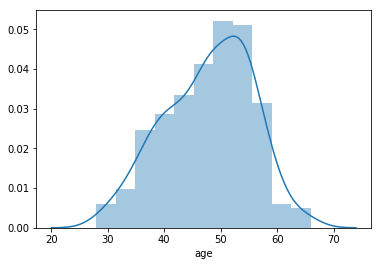

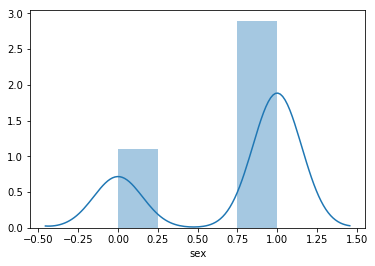

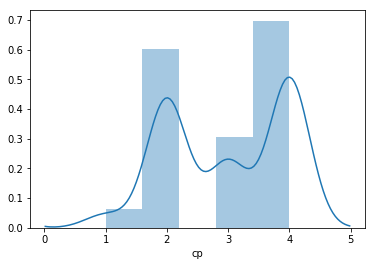

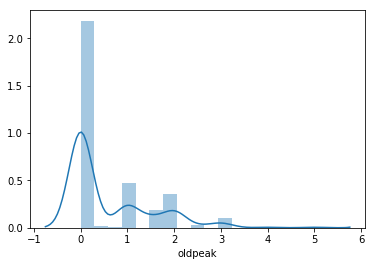

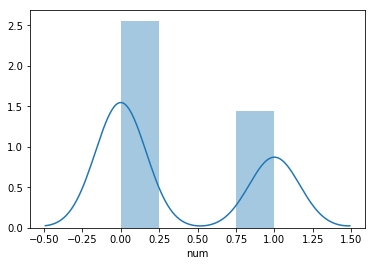

In [14]:
for c in df.columns:
    if df[c].dtype in ['int64', 'float64']:
        sns.distplot(df[c].dropna(), kde=True)
        plt.show()

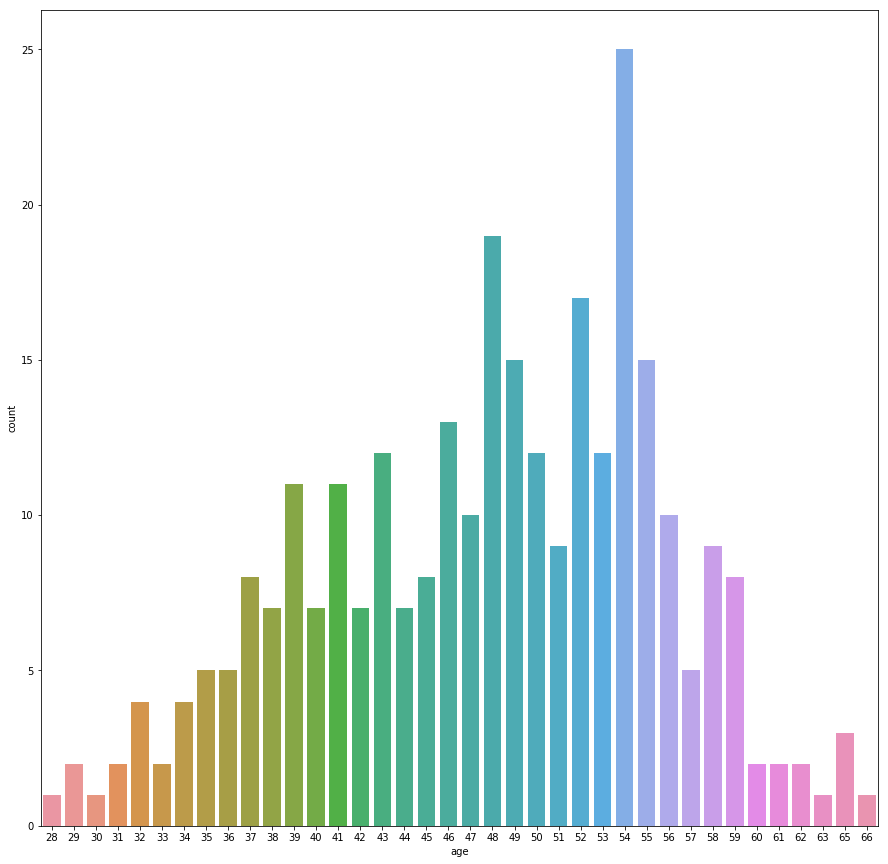

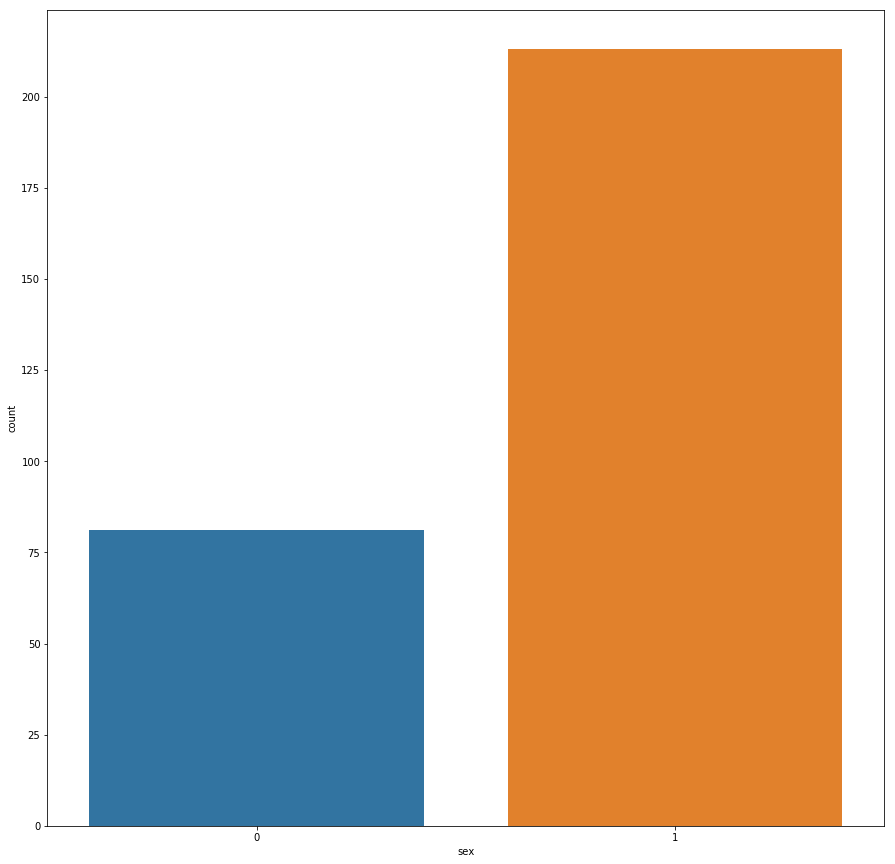

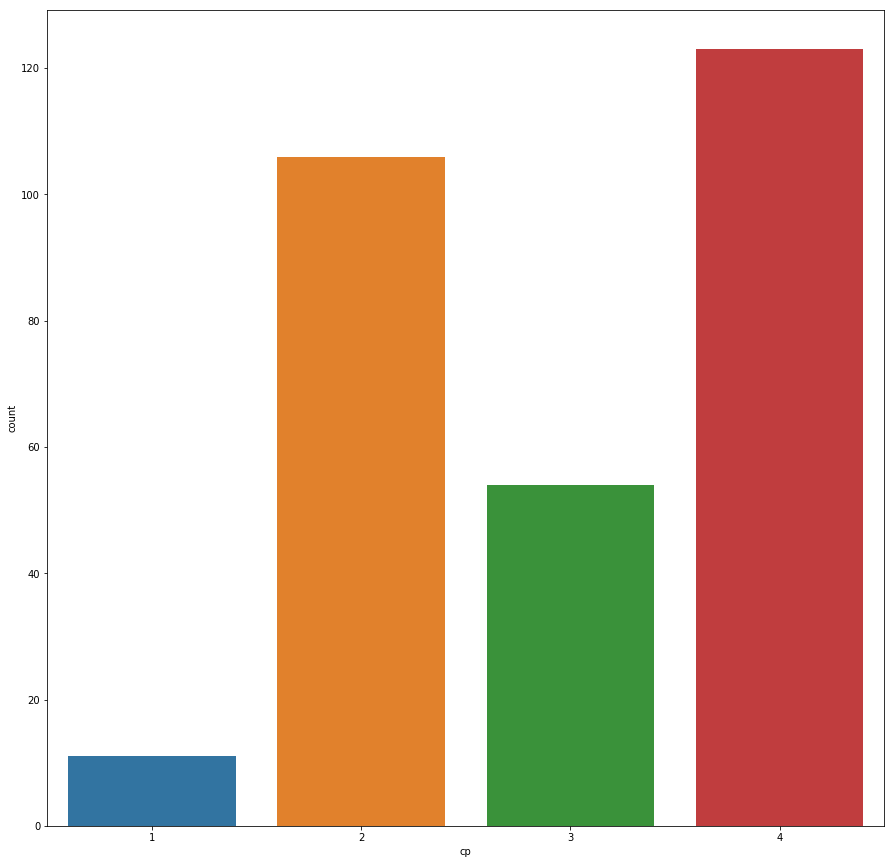

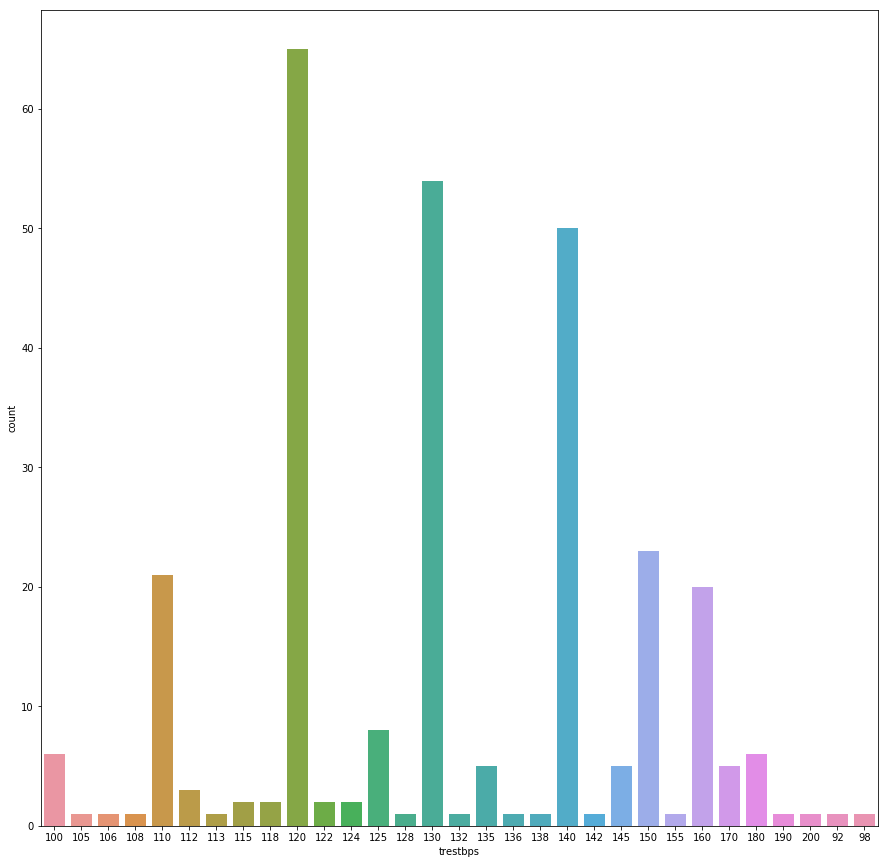

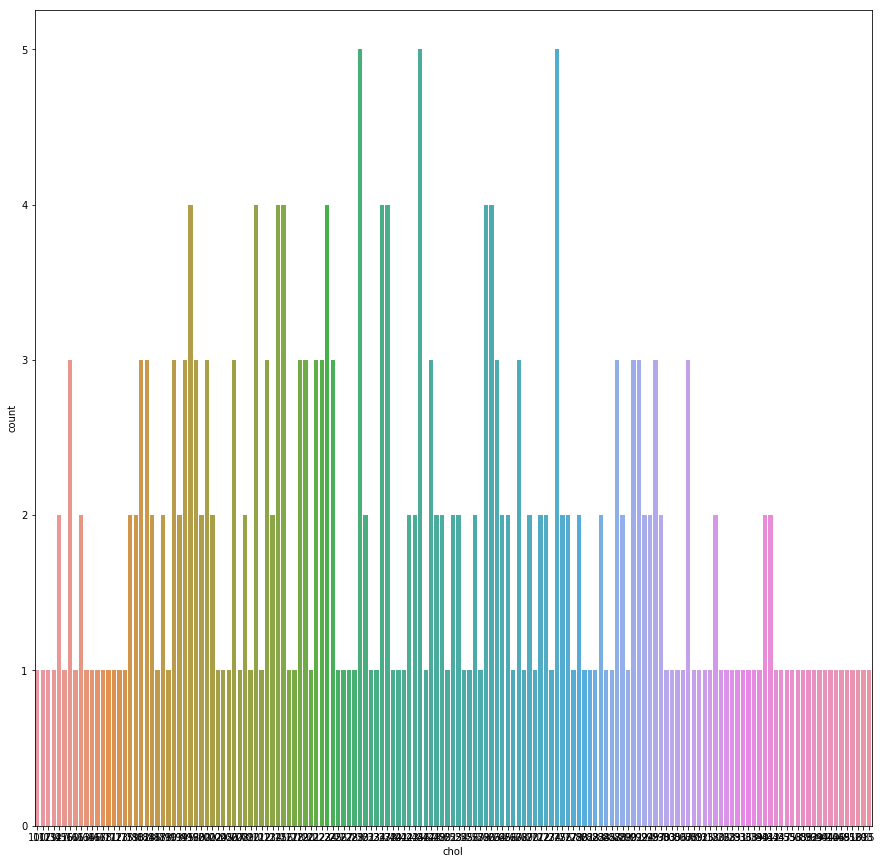

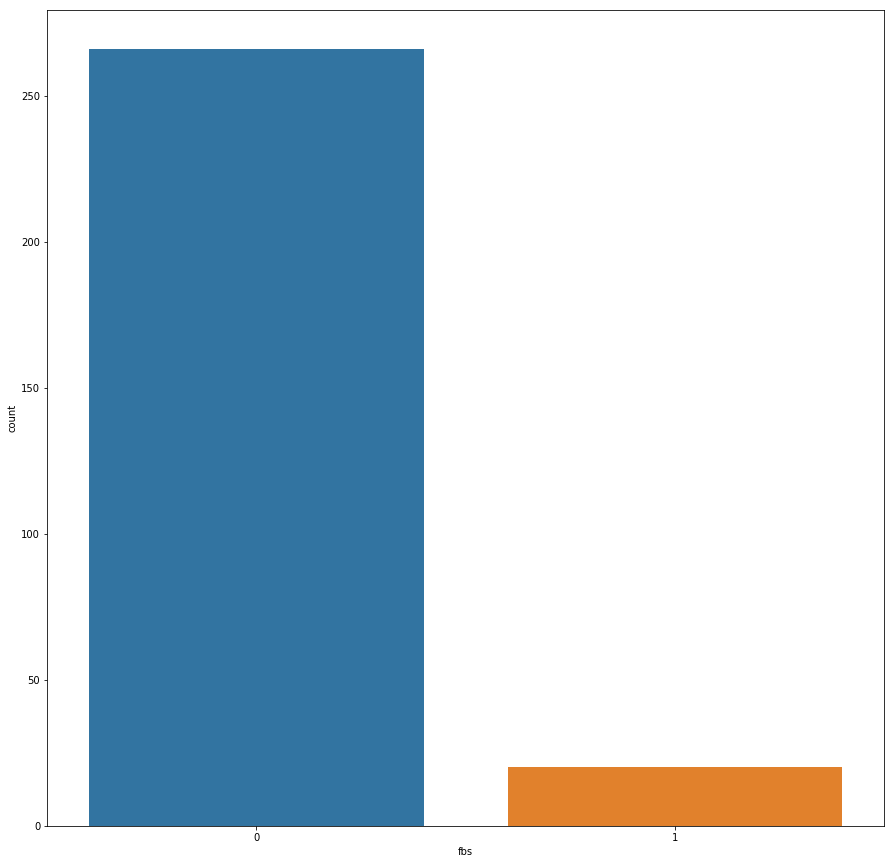

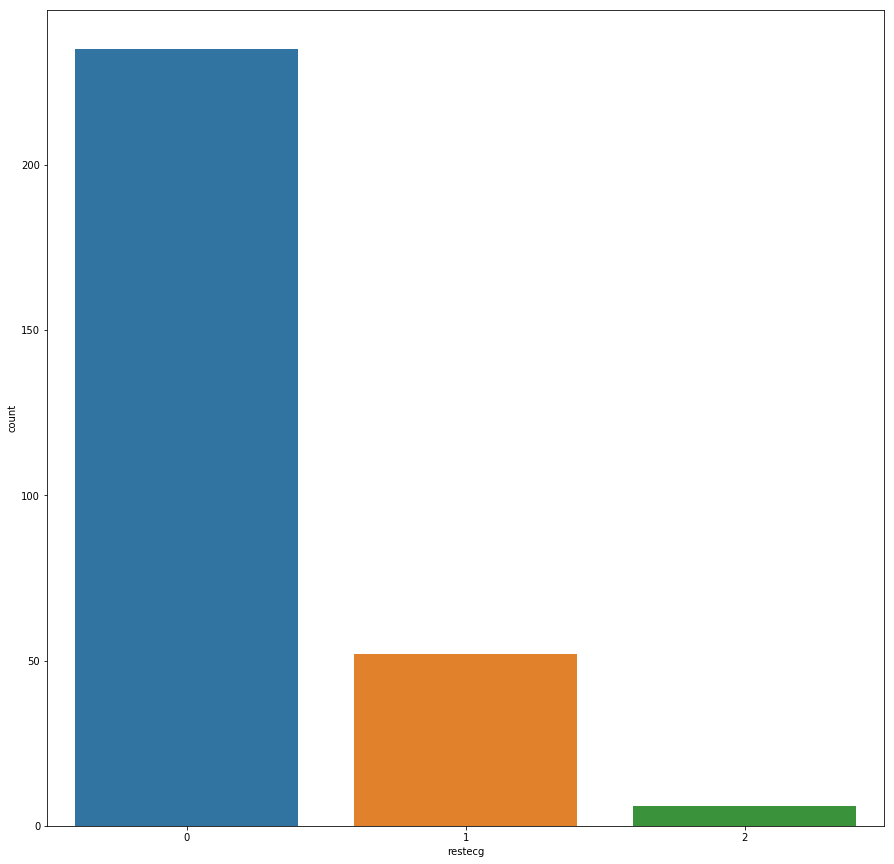

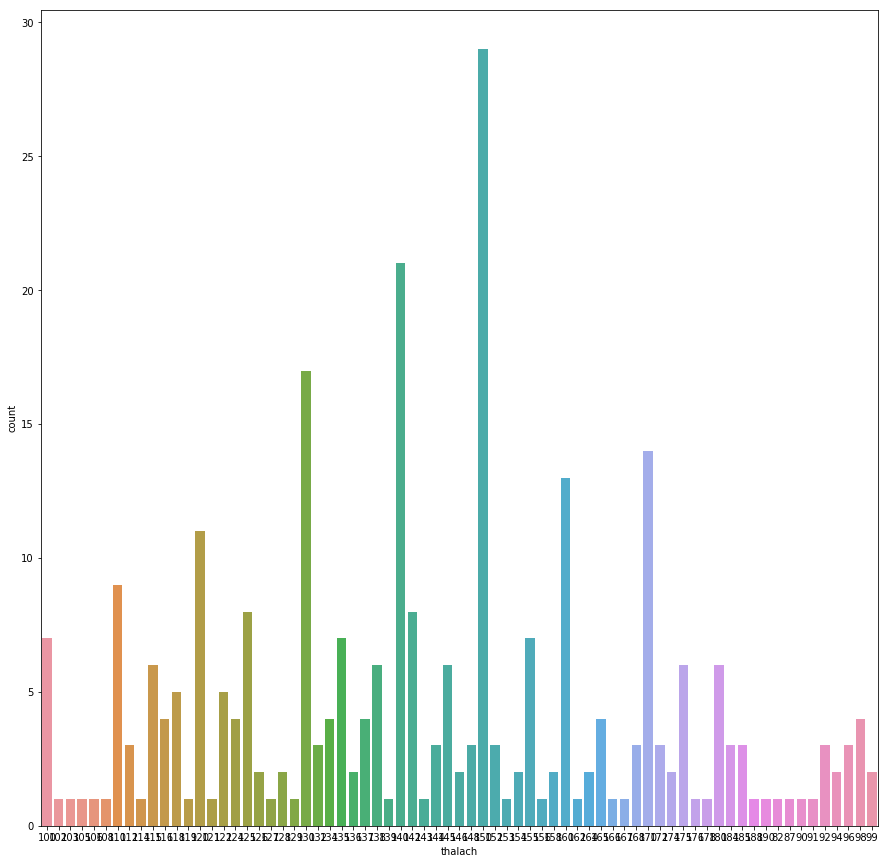

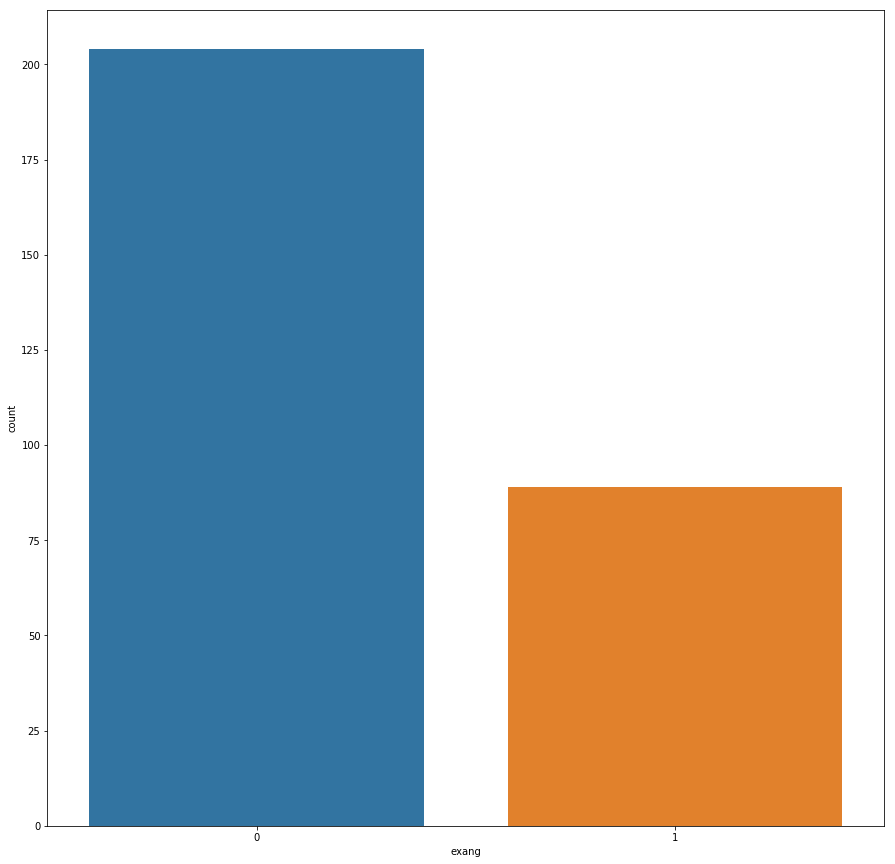

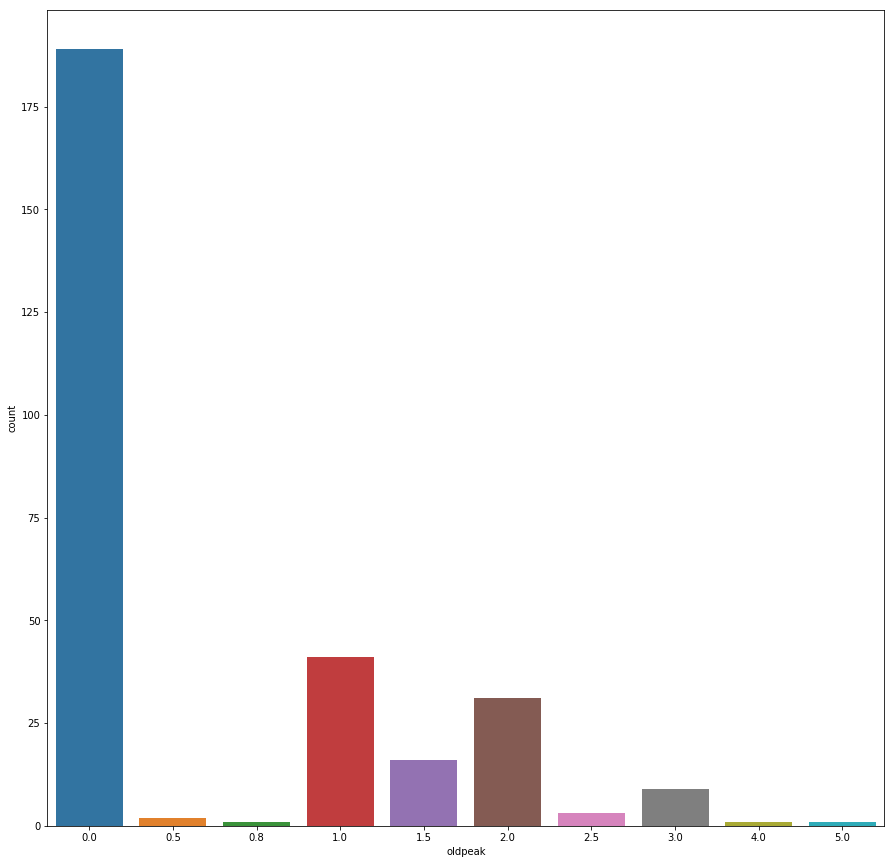

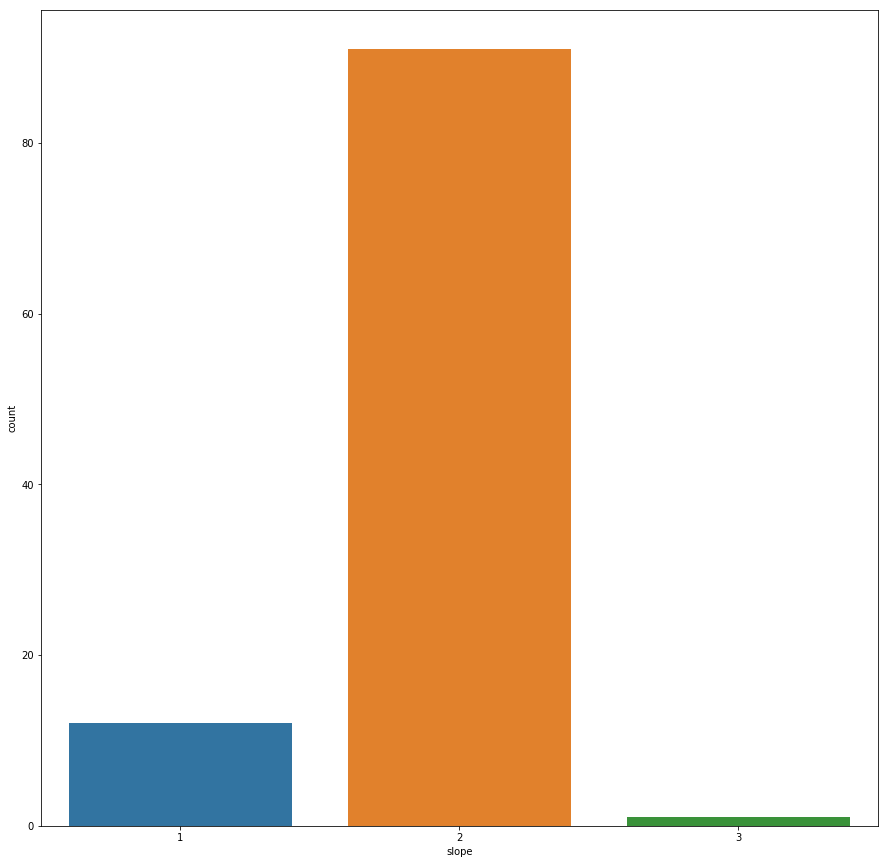

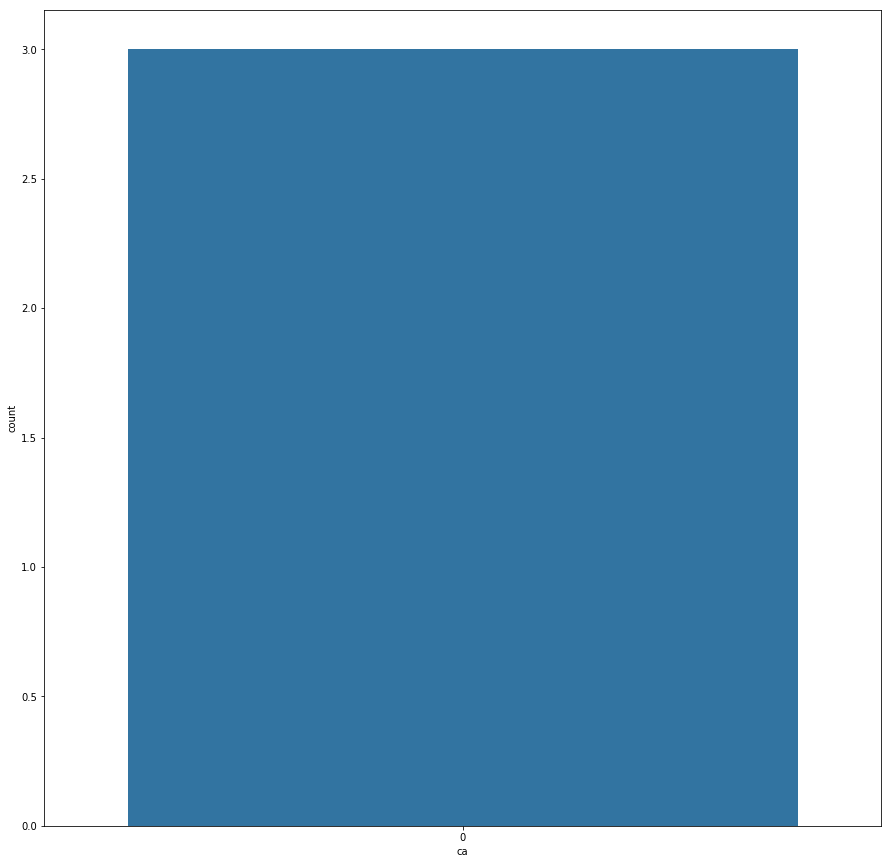

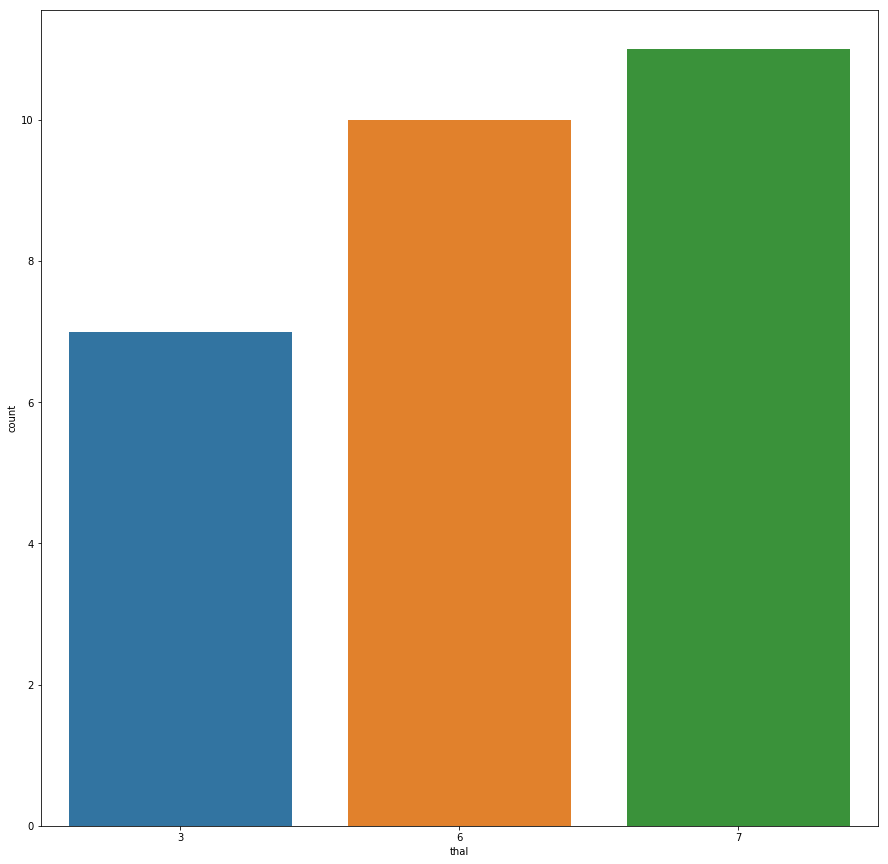

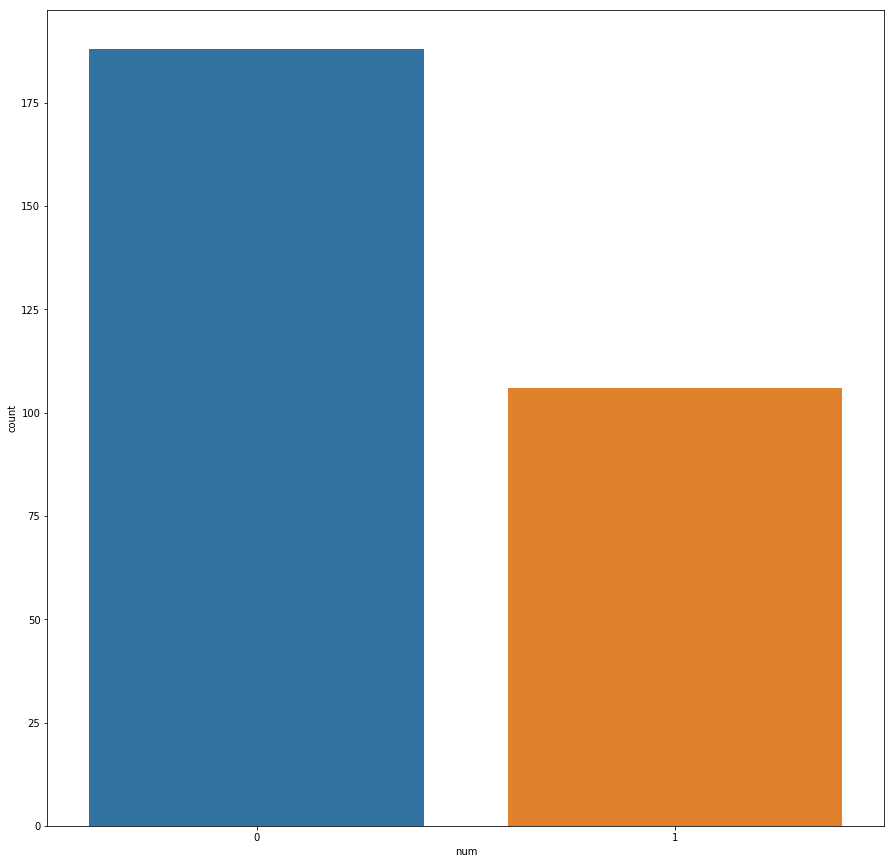

In [15]:

for c in df.columns:
  #  if df[c].dtype not in ['int64', 'float64']:
        plt.figure(figsize=(15,15))
        sns.countplot(df[c].dropna())
        plt.show()

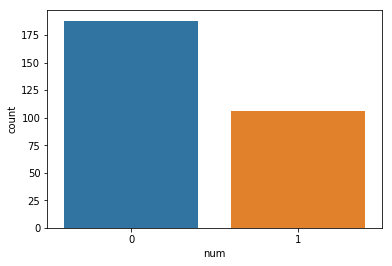

In [16]:
sns.countplot(df.num)
plt.show()

#### from the above plot we can understand that class 0 is having more obersvations than class 1 , class 0 is the higher class

In [17]:
df.isnull().sum()        # checking for null Values

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          291
thal        266
num           0
dtype: int64

In [18]:
# delete slope,ca,thal because it has a lot of null values

del df['slope']       
del df['ca']           
del df['thal']        

In [19]:
df.isnull().sum()  


age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
num          0
dtype: int64

In [20]:
col=['trestbps','chol','fbs','restecg','thalach','exang']  
for  columns in col:
        print("\n{} \t {}".format(df[columns].value_counts(),columns))


120    65
130    54
140    50
150    23
110    21
160    20
125     8
100     6
180     6
135     5
170     5
145     5
112     3
122     2
115     2
118     2
124     2
113     1
200     1
138     1
142     1
106     1
98      1
155     1
105     1
136     1
132     1
190     1
92      1
128     1
108     1
Name: trestbps, dtype: int64 	 trestbps

230    5
275    5
246    5
216    4
211    4
215    4
237    4
238    4
263    4
260    4
224    4
196    4
198    3
225    3
308    3
219    3
292    3
297    3
223    3
264    3
222    3
291    3
193    3
220    3
207    3
184    3
288    3
201    3
268    3
182    3
      ..
228    1
233    1
309    1
168    1
305    1
518    1
204    1
221    1
208    1
173    1
358    1
306    1
271    1
529    1
267    1
388    1
466    1
287    1
241    1
175    1
338    1
85     1
491    1
365    1
393    1
392    1
259    1
234    1
164    1
307    1
Name: chol, Length: 153, dtype: int64 	 chol

0    266
1     20
Name: fbs, dtype: int64 	 fbs

0   

In [21]:

df.trestbps=df.trestbps.astype('float64')
df.chol=df.chol.astype('float64')
df.fbs=df.fbs.astype('float64')
df.restecg=df.restecg.astype('float64')
df.thalach=df.thalach.astype('float64')
df.exang=df.exang.astype('float64')

In [22]:
col=['trestbps','chol','fbs','restecg','thalach','exang']  
for  columns in col:
        print("\n{} \t {}".format(df[columns].value_counts(),columns))


120.0    65
130.0    54
140.0    50
150.0    23
110.0    21
160.0    20
125.0     8
100.0     6
180.0     6
145.0     5
135.0     5
170.0     5
112.0     3
118.0     2
122.0     2
124.0     2
115.0     2
105.0     1
98.0      1
155.0     1
190.0     1
128.0     1
132.0     1
108.0     1
113.0     1
92.0      1
106.0     1
200.0     1
138.0     1
136.0     1
142.0     1
Name: trestbps, dtype: int64 	 trestbps

275.0    5
230.0    5
246.0    5
238.0    4
216.0    4
263.0    4
211.0    4
224.0    4
260.0    4
215.0    4
196.0    4
237.0    4
207.0    3
288.0    3
291.0    3
182.0    3
292.0    3
223.0    3
248.0    3
297.0    3
193.0    3
268.0    3
213.0    3
184.0    3
201.0    3
219.0    3
198.0    3
264.0    3
308.0    3
195.0    3
        ..
251.0    1
468.0    1
274.0    1
221.0    1
312.0    1
171.0    1
208.0    1
393.0    1
344.0    1
394.0    1
256.0    1
326.0    1
229.0    1
85.0     1
318.0    1
172.0    1
156.0    1
282.0    1
117.0    1
466.0    1
247.0    1
226.0    1
206

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
age         294 non-null int64
sex         294 non-null int64
cp          294 non-null int64
trestbps    293 non-null float64
chol        271 non-null float64
fbs         286 non-null float64
restecg     293 non-null float64
thalach     293 non-null float64
exang       293 non-null float64
oldpeak     294 non-null float64
num         294 non-null int64
dtypes: float64(7), int64(4)
memory usage: 25.3 KB


In [25]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
num           int64
dtype: object

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [27]:

print(df.trestbps.median())
print(df.chol.median())
print(df.fbs.mode())
print(df.restecg.mode())
print(df.thalach.median())
print(df.exang.mode())

130.0
243.0
0    0.0
dtype: float64
0    0.0
dtype: float64
140.0
0    0.0
dtype: float64


In [28]:
#Replacing null values

df.trestbps.fillna(df.trestbps.median(),inplace=True)
df.chol.fillna(df.chol.median(),inplace=True)
df.fbs.fillna(0.0,inplace=True)
df.restecg.fillna(0.0,inplace=True)
df.thalach.fillna(df.thalach.median(),inplace=True)
df.exang.fillna(0.0,inplace=True)

In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [30]:
col=['trestbps','chol','fbs','restecg','thalach','exang']  
for  columns in col:
        print("\n{} \t {}".format(df[columns].value_counts(),columns))


120.0    65
130.0    55
140.0    50
150.0    23
110.0    21
160.0    20
125.0     8
100.0     6
180.0     6
145.0     5
135.0     5
170.0     5
112.0     3
118.0     2
122.0     2
124.0     2
115.0     2
105.0     1
98.0      1
155.0     1
190.0     1
128.0     1
132.0     1
108.0     1
113.0     1
92.0      1
106.0     1
200.0     1
138.0     1
136.0     1
142.0     1
Name: trestbps, dtype: int64 	 trestbps

243.0    25
246.0     5
275.0     5
230.0     5
216.0     4
263.0     4
238.0     4
260.0     4
224.0     4
211.0     4
215.0     4
196.0     4
237.0     4
207.0     3
288.0     3
248.0     3
182.0     3
292.0     3
223.0     3
193.0     3
268.0     3
297.0     3
213.0     3
184.0     3
291.0     3
160.0     3
308.0     3
219.0     3
198.0     3
225.0     3
         ..
251.0     1
468.0     1
274.0     1
221.0     1
312.0     1
171.0     1
208.0     1
393.0     1
344.0     1
394.0     1
256.0     1
326.0     1
229.0     1
85.0      1
318.0     1
172.0     1
156.0     1
282.0     

Text(0.5,1,'Number of Heart Disease Cases by Gender')

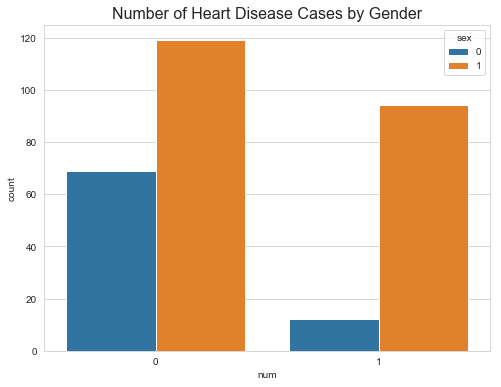

In [31]:
# Visualize the number of disease cases by sex (male =1 and female =0)
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.countplot(x='num', data=df,hue='sex')
plt.title('Number of Heart Disease Cases by Gender',fontsize=16)

In [32]:

print('The min age for men diagnosed with heart disease is: %s years'%df[(df['num']==1) & (df['sex']==1)]['age'].min())
print('The max age for men diagnosed with heart disease is: %s years'%df[(df['num']==1) & (df['sex']==1)]['age'].max())
print('The average age for men diagnosed with heart disease is: %s years'%df[(df['num']==1) & (df['sex']==1)]['age'].mean())



print( '\nThe min age for wonmen diagnosed with heart disease is: %s years'%df[(df['num']==1) & (df['sex']==0)]['age'].min())
print( 'The max age for women diagnosed with heart disease is: %s years'%df[(df['num']==1) & (df['sex']==0)]['age'].max())
print( 'The average age for women diagnosed with heart disease is: %s years'%df[(df['num']==1) & (df['sex']==0)]['age'].mean())

The min age for men diagnosed with heart disease is: 31 years
The max age for men diagnosed with heart disease is: 66 years
The average age for men diagnosed with heart disease is: 49.5 years

The min age for wonmen diagnosed with heart disease is: 33 years
The max age for women diagnosed with heart disease is: 59 years
The average age for women diagnosed with heart disease is: 49.333333333333336 years


In [33]:
###  we can see that men has higher probability of heart disease compared to females

In [34]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,243.0,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [35]:
df=pd.get_dummies(df)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
2,29,1,2,140.0,243.0,0.0,0.0,170.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0


In [36]:
df.shape

(294, 11)

In [37]:


# Perform scaling to standardize the values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dfs=sc.fit_transform(df.drop(columns='num'))
x= dfs

y= df['num']

x_temp, x_test, y_temp, y_test = train_test_split(x,y, test_size=0.3, random_state=5)                  # spliting it into train and test
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp, test_size=0.3, random_state=5)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((143, 10), (143,), (89, 10), (89,))

In [38]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
ypred1=logreg.predict(x_val)

In [40]:
logreg.score(x_train, y_train)

0.8531468531468531

In [41]:
logreg.score(x_val, y_val)

0.8225806451612904

In [42]:
### There is drop in accuracy in test when compared with train

In [43]:
print(metrics.classification_report(y_val,ypred1))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.94      0.60      0.73        25

   micro avg       0.82      0.82      0.82        62
   macro avg       0.86      0.79      0.80        62
weighted avg       0.85      0.82      0.81        62



In [44]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)



print('Logistic Regression:')
print('Train',logreg.score(x_train,y_train))
print('Valid',logreg.score(x_val,y_val))
print('Test',logreg.score(x_test,y_test))
print('\n\n')

print('Decision Tree:')
print('Train',dt.score(x_train,y_train))
print('Valid',dt.score(x_val,y_val))
print('Test',dt.score(x_test,y_test))
print('\n\n')

print('Random Forest:')
print('Train',rf.score(x_train,y_train))
print('Valid',rf.score(x_val,y_val))
print('Test',rf.score(x_test,y_test))
print('\n\n')



Logistic Regression:
Train 0.8531468531468531
Valid 0.8225806451612904
Test 0.8539325842696629



Decision Tree:
Train 1.0
Valid 0.5967741935483871
Test 0.7078651685393258



Random Forest:
Train 0.9790209790209791
Valid 0.7580645161290323
Test 0.7528089887640449





In [45]:
sm=SMOTE(k_neighbors=5,random_state=1)      # used for Oversampling
x_os,y_os=sm.fit_sample(x,y)
x=x_os
y=y_os
x_temp,x_test,y_temp,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,test_size=0.3,random_state=1)

In [46]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [47]:
bc = BaggingClassifier(oob_score=True,random_state=1)
bc.fit(x_train,y_train)
bc.oob_score_


0.8097826086956522

In [48]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(x_train,y_train)


test_pred = abcl.predict(x_val)
abcl.score(x_val,y_val)


0.7848101265822784

In [49]:
gb = GradientBoostingClassifier(max_depth=5)
gb.fit(x_train,y_train)
gb.score(x_val,y_val)

0.8354430379746836

In [50]:
print('Logistic Regression:')
print('Train',logreg.score(x_train,y_train))
print('Valid',logreg.score(x_val,y_val))
print('Test',logreg.score(x_test,y_test))
print('\n\n')

print('Decision Tree:')
print('Train',dt.score(x_train,y_train))
print('Valid',dt.score(x_val,y_val))
print('Test',dt.score(x_test,y_test))
print('\n\n')

print('Random Forest:')
print('Train',rf.score(x_train,y_train))
print('Valid',rf.score(x_val,y_val))
print('Test',rf.score(x_test,y_test))
print('\n\n')

print('Gradient Descent:')
print('Train',gb.score(x_train,y_train))
print('Valid',gb.score(x_val,y_val))
print('Test',gb.score(x_test,y_test))
print('\n\n')


Logistic Regression:
Train 0.8532608695652174
Valid 0.8354430379746836
Test 0.7522123893805309



Decision Tree:
Train 1.0
Valid 0.7721518987341772
Test 0.7079646017699115



Random Forest:
Train 0.9945652173913043
Valid 0.8481012658227848
Test 0.6991150442477876



Gradient Descent:
Train 1.0
Valid 0.8354430379746836
Test 0.7787610619469026





In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(n_estimators=50)

param_dist = {"max_depth": range(1,20),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              'n_estimators': range(1,100),
              'random_state':range(1,100),
              "criterion": ["gini", "entropy"]}

samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) 

randomCV.fit(x_train, y_train)

print(randomCV.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 50, 'random_state': 42}


In [52]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
brf = BalancedRandomForestClassifier(bootstrap=True,n_estimators=69, random_state=78,criterion='gini', max_depth=17, min_samples_leaf= 10, min_samples_split = 4)
brf.fit(x_train, y_train) 
y_trainpred=brf.predict(x_train)
y_pred = brf.predict(x_test)
print(balanced_accuracy_score(y_train,y_trainpred)  )
print(balanced_accuracy_score(y_test, y_pred)  )

brf.feature_importances_  

0.8690715552927262
0.7729285262492094


array([0.02567822, 0.00924916, 0.33741102, 0.04343932, 0.03950203,
       0.        , 0.0004226 , 0.13744276, 0.23475737, 0.17209754])

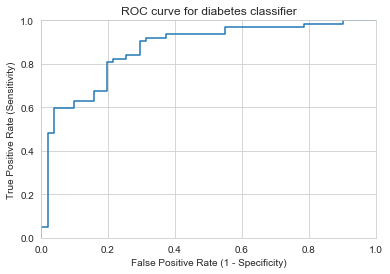

In [53]:

y_pred_class = logreg.predict(x_test)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [54]:
data=pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1)

In [55]:
clf = RandomForestClassifier(n_estimators=50)

param_dist = {"max_depth": range(1,20)}

samples = 100  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples) 
randomCV.fit(x_train, y_train)
print(randomCV.best_params_)

{'max_depth': 8}


In [60]:
data=np.asarray(data,dtype='float64')

from sklearn.utils import resample
import numpy as np

values = data
n_iterations = 100              
n_size = int(len(values) *  1)   
stats = list()

for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = RandomForestClassifier(max_depth=8)
    model.fit(train[:,:-1], train[:,-1])
    score = model.score(test[:,:-1], test[:,-1])  
    print(score)
    stats.append(score)

0.8296296296296296
0.837037037037037
0.8040540540540541
0.8613138686131386
0.8740740740740741
0.8257575757575758
0.8636363636363636
0.8102189781021898
0.7730496453900709
0.7987012987012987
0.8231292517006803
0.828125
0.8137931034482758
0.8357142857142857
0.8203125
0.8396946564885496
0.8449612403100775
0.8441558441558441
0.8527131782945736
0.8513513513513513
0.8561151079136691
0.84251968503937
0.7862595419847328
0.8062015503875969
0.8698630136986302
0.8428571428571429
0.8435374149659864
0.8333333333333334
0.8156028368794326
0.8283582089552238
0.795774647887324
0.8285714285714286
0.8345323741007195
0.7571428571428571
0.8
0.8285714285714286
0.8333333333333334
0.8345323741007195
0.8251748251748252
0.7709923664122137
0.8235294117647058
0.8478260869565217
0.8333333333333334
0.8014705882352942
0.8251748251748252
0.851063829787234
0.8380281690140845
0.8489208633093526
0.8450704225352113
0.816793893129771
0.8428571428571429
0.7846153846153846
0.8518518518518519
0.8391608391608392
0.775510204081

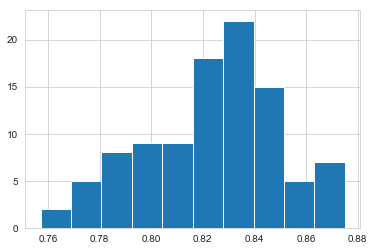

95.0 confidence interval 77.1% and 87.4%


In [61]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [58]:
data=np.asarray(data,dtype='float64')

from sklearn.utils import resample
import numpy as np

values = data
n_iterations = 100              
n_size = int(len(values) *  1)   
stats = list()

for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    model = AdaBoostClassifier(n_estimators=50)
    model.fit(train[:,:-1], train[:,-1])
    score = model.score(test[:,:-1], test[:,-1])  
    print(score)
    stats.append(score)

0.8125
0.8085106382978723
0.8285714285714286
0.8307692307692308
0.7692307692307693
0.8561151079136691
0.8321167883211679
0.7571428571428571
0.8321167883211679
0.8074074074074075
0.8321167883211679
0.8111888111888111
0.8518518518518519
0.7482517482517482
0.8231292517006803
0.7956204379562044
0.7786259541984732
0.7952755905511811
0.7943262411347518
0.8169014084507042
0.816793893129771
0.8211382113821138
0.7559055118110236
0.7943262411347518
0.7986111111111112
0.8015873015873016
0.8321167883211679
0.8175182481751825
0.7536231884057971
0.7152777777777778
0.796875
0.8333333333333334
0.8602941176470589
0.8175182481751825
0.7928571428571428
0.8
0.8321678321678322
0.7769230769230769
0.7692307692307693
0.8206896551724138
0.8461538461538461
0.8695652173913043
0.8410596026490066
0.7985074626865671
0.8013698630136986
0.8201438848920863
0.8057553956834532
0.8549618320610687
0.7872340425531915
0.7793103448275862
0.8248175182481752
0.8085106382978723
0.7847222222222222
0.8285714285714286
0.8493150684

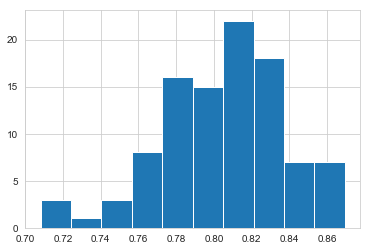

95.0 confidence interval 72.8% and 86.0%


In [59]:
from matplotlib import pyplot

# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### from the above observations we can see that random forest is the best ensemble method